<a href="https://colab.research.google.com/github/Jayden-Nyamiaka/Machine-Learning-and-Data-Mining/blob/main/nyamiaka_jayden_2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2


In [ ]:
# Setup:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

# Example code using the polyfit and kfold functions

**Note: This section is not part of the homework problem, but provides some potentially-helpful example code regarding the usage of numpy.polyfit, numpy.polyval, and sklearn.model_selection.KFold.**

First, let's generate some synthetic data: a quadratic function plus some Gaussian noise.

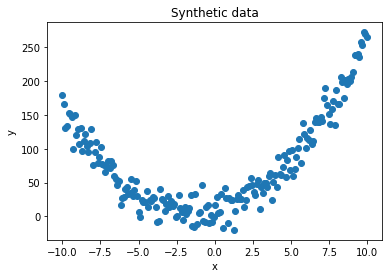

In [ ]:
# Coefficients of the quadratic function, y(x) = ax^2 + bx + c:
a = 2
b = 5
c = 7

N = 200       # Number of data points
x = np.linspace(-10, 10, num = N)           # x ranges from -10 to 10
# y is the quadratic function of x specified by a, b, and c, plus noise
y = a*x**2 + b*x + c + 15* np.random.randn(N)

# Plot the data:
# Creates new figure
plt.figure() 
# Plots y vs x to our specifications (circle marker and no lines)
plt.plot(x, y, marker = 'o', linewidth = 0) 

# Labels the figure
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic data')

plt.show()

Next, we'll use the numpy.polyfit function to fit a quadratic polynomial to this data. We can evaluate the resulting polynomial at arbitrary points.



We fit the following quadratic function: f(x) = 2.008576*x^2 + 5.188771*x + 8.346451

f(4) = 61.238748


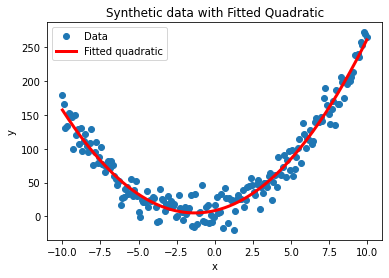

In [ ]:
# Fit a degree-2 polynomial to the data:
degree = 2
coefficients = np.polyfit(x, y, degree)

# Print out the resulting quadratic function:
print('We fit the following quadratic function: f(x) = %f*x^2 + %f*x + %f' %  \
      (coefficients[0], coefficients[1], coefficients[2]))

# Evaluate the fitted polynomial at x = 4:
x_test = 4
f_eval = np.polyval(coefficients, x_test)
print('\nf(%i) = %f' % (x_test, f_eval))

# Let's visualize our fitted quadratic:
plt.figure()

plt.plot(x, y, marker = 'o', linewidth = 0)
plt.plot(x, np.polyval(coefficients, x), color = 'red', linewidth = 3)

plt.legend(['Data', 'Fitted quadratic'], loc = 'best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic data with Fitted Quadratic')

plt.show()

Finally, assume that we'd like to perform 10-fold cross validation with this dataset. Let's divide it into training and test sets, and print out the test sets. To limit the amount of text that we are printing out, we'll modify the dataset to make it smaller.



In [ ]:
# Coefficients of the quadratic function, y = ax^2 + bx + c:
a = 2
b = 5
c = 7

N = 80       # Number of points--fewer this time!
x = np.linspace(-10, 10, num = N)                # x ranges from -10 to 10
# y is the quadratic function of x specified by a, b, and c, plus noise
y = a*x**2 + b*x + c + 15* np.random.randn(N)

# Initialize kfold cross-validation object with 10 folds:
num_folds = 10
kf = KFold(n_splits=num_folds)

# Iterate through cross-validation folds:
i = 1
for train_index, test_index in kf.split(x):
    
    # Print out test indices:
    print('Fold ', i, ' of ', num_folds, ' test indices:', test_index)
    
    # Training and testing data points for this fold:
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    i += 1

Fold  1  of  10  test indices: [0 1 2 3 4 5 6 7]
Fold  2  of  10  test indices: [ 8  9 10 11 12 13 14 15]
Fold  3  of  10  test indices: [16 17 18 19 20 21 22 23]
Fold  4  of  10  test indices: [24 25 26 27 28 29 30 31]
Fold  5  of  10  test indices: [32 33 34 35 36 37 38 39]
Fold  6  of  10  test indices: [40 41 42 43 44 45 46 47]
Fold  7  of  10  test indices: [48 49 50 51 52 53 54 55]
Fold  8  of  10  test indices: [56 57 58 59 60 61 62 63]
Fold  9  of  10  test indices: [64 65 66 67 68 69 70 71]
Fold  10  of  10  test indices: [72 73 74 75 76 77 78 79]


# Loading the Data for Problem 2

This code loads the data from bv_data.csv using the load_data helper function. Note that data[:, 0] is an array of all the x values in the data and data[:, 1] is an array of the corresponding y values.


In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    Input:
        filename: given as a string.
    Output:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [ ]:
data = load_data('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set1/src/data/bv_data.csv')
x = data[:, 0]
y = data[:, 1]

Write your code below for solving problem 2 part B:

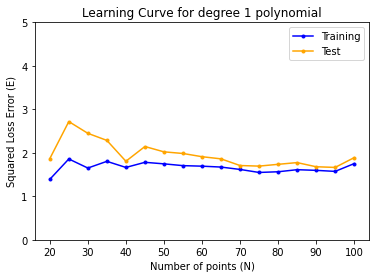

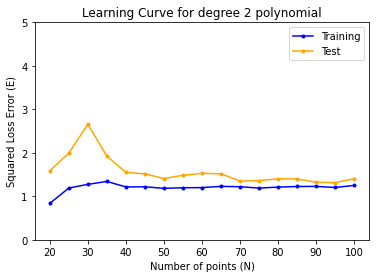

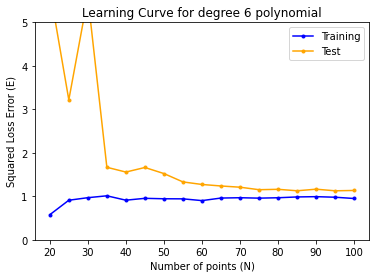

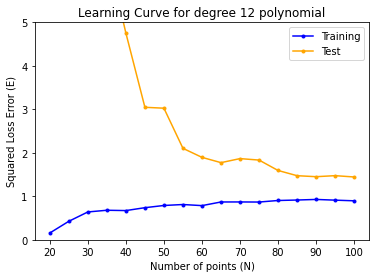

In [ ]:
# Defines our error function as the squared loss function
def error_func(actual, prediction):
  return (actual - prediction) ** 2

# Helper function to compute the average error
def compute_avg_error(model, x_data, y_data, point_indices):
  total_error = 0
  for point_idx in point_indices:
    y_actual = y_data[point_idx]
    y_predict = np.polyval(model, x_data[point_idx])
    error = error_func(y_actual, y_predict)
    total_error += error
  return (total_error / point_indices.size)

# Declares parameters defined by problem
num_folds = 5
degrees = [1, 2, 6, 12]
num_points = [*range(20, 101, 5)]
plot_upper_y_limit = 5

# Plots a graph for each degree stated in problem
for degree in degrees:
  training_errors = [None] * len(num_points)
  test_errors = [None] * len(num_points)

  # Performs on num points [20, 25, 30, ... , 100]
  N_index = 0
  for N in num_points: 
    N_training_error = 0
    N_test_error = 0

    # Gets the first n data points from x and y
    x_n = x[:N]
    y_n = y[:N]

    # Splits data set into k partitions
    kf = KFold(n_splits=num_folds)

    # Iterates through cross-validation folds:
    for train_indices, test_indices in kf.split(x_n):
      # Training and testing data points for this fold
      x_train, x_test = x_n[train_indices], x_n[test_indices]
      y_train, y_test = y_n[train_indices], y_n[test_indices]

      # Fits a d=degree polynomial model to the training data
      coefficients = np.polyfit(x_train, y_train, degree)

      # Computes the training and test error for this fold
      fold_training_error = compute_avg_error(coefficients, x_n, y_n, train_indices)
      N_training_error += fold_training_error
      fold_test_error = compute_avg_error(coefficients, x_n, y_n, test_indices)
      N_test_error += fold_test_error

    # Gets the average training and test error over all folds
    N_training_error /= num_folds
    N_test_error /= num_folds
    training_errors[N_index] = N_training_error
    test_errors[N_index] = N_test_error

    N_index += 1

  # Plots the learning curve for each degree
  plt.figure() 

  # Sets same y-scale for all degrees
  plt.ylim(0, plot_upper_y_limit)

  plt.plot(num_points, training_errors, marker = '.', color = "blue") 
  plt.plot(num_points, test_errors, marker = '.', color = "orange") 

  # Labels the figure
  plt.legend(['Training', 'Test'], loc = 'best')
  plt.xlabel('Number of points (N)')
  plt.ylabel('Squared Loss Error (E)')
  plt.title('Learning Curve for degree ' + str(degree) + ' polynomial')

  plt.show()